# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


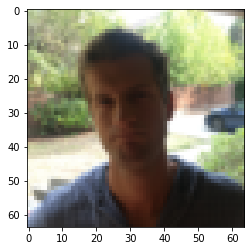

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
    # output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 4s 166ms/step - loss: 0.6980 - accuracy: 0.5083
Epoch 2/50
19/19 [==============================] - 3s 165ms/step - loss: 0.6722 - accuracy: 0.5750
Epoch 3/50
19/19 [==============================] - 3s 167ms/step - loss: 0.6517 - accuracy: 0.6167
Epoch 4/50
19/19 [==============================] - 3s 166ms/step - loss: 0.4996 - accuracy: 0.7783
Epoch 5/50
19/19 [==============================] - 3s 170ms/step - loss: 0.3410 - accuracy: 0.8533
Epoch 6/50
19/19 [==============================] - 3s 168ms/step - loss: 0.2309 - accuracy: 0.9017
Epoch 7/50
19/19 [==============================] - 3s 170ms/step - loss: 0.1876 - accuracy: 0.9183
Epoch 8/50
19/19 [==============================] - 3s 170ms/step - loss: 0.1358 - accuracy: 0.9533
Epoch 9/50
19/19 [==============================] - 3s 172ms/step - loss: 0.1464 - accuracy: 0.9383
Epoch 10/50
19/19 [==============================] - 3s 175ms/step - loss: 0.1068 - accuracy: 0.9617

# Evaluate / Test

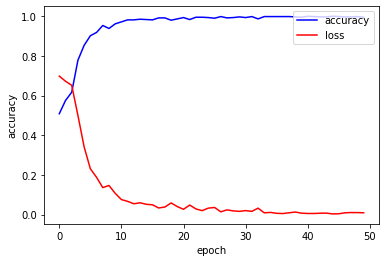

In [ ]:
plt.plot(history_model.history['accuracy'],color='blue')
plt.plot(history_model.history['loss'],color='red')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc='upper right')
plt.show()

Evaluate Test set

In [ ]:
val_loss, val_acc = model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 45ms/step - loss: 0.1209 - accuracy: 0.9600


Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(X_test, steps=4500 // 64)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report')
target_names = Y_test
class_labels = list(Y_test)   
report = classification_report(target_names, y_pred)
print(report) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[66  0]
 [84  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        66
           1       0.00      0.00      0.00        84

    accuracy                           0.44       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.19      0.44      0.27       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


In [ ]:
model.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 4s 172ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 2/50
19/19 [==============================] - 3s 172ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 3/50
19/19 [==============================] - 3s 172ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 4/50
19/19 [==============================] - 3s 171ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 5/50
19/19 [==============================] - 3s 169ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 6/50
19/19 [==============================] - 3s 173ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 7/50
19/19 [==============================] - 3s 169ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 8/50
19/19 [==============================] - 3s 169ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 9/50
19/19 [==============================] - 3s 169ms/step - loss: 0.0045 - accuracy: 0.9983
Epoch 10/50
19/19 [==============================] - 3s 168ms/step - loss: 0.0045 - accuracy: 0.9983

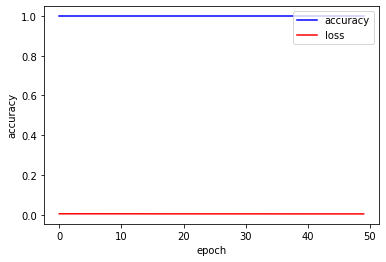

In [ ]:
plt.plot(history_model.history['accuracy'],color='blue')
plt.plot(history_model.history['loss'],color='red')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc='upper right')
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 44ms/step - loss: 0.1162 - accuracy: 0.9533


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(X_test, steps=4500 // 64)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report')
target_names = Y_test
class_labels = list(Y_test)   
report = classification_report(target_names, y_pred)
print(report) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


Confusion Matrix
[[66  0]
 [84  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        66
           1       0.00      0.00      0.00        84

    accuracy                           0.44       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.19      0.44      0.27       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


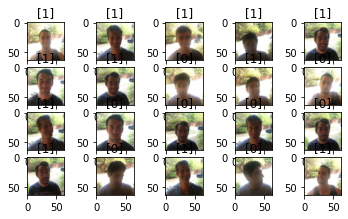

In [ ]:
import matplotlib.pyplot as plt

for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  print("\n")
  plt.title(Y_test[i])
